<a href="https://colab.research.google.com/github/yovictoraugusto/Competi-o-de-rvores-de-Decis-o/blob/main/Competi%C3%A7%C3%A3o_de_%C3%81rvores_de_Decis%C3%A3o_Victor_Marques_156620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier

from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA 1-2024/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
alldata = [data_train, data_test]

In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
data_train.columns.values.shape

(12,)

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data_train['Embarked'].isna().sum()

2

In [ ]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
data_train['Embarked'].isna().sum()

0

In [ ]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
# 1 --> coluna; 0 --> linha

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'] not found in axis"

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,NaN
1,1,1,1,38.0,1,0,NaN
2,1,3,1,26.0,0,0,NaN
3,1,1,1,35.0,1,0,NaN
4,0,3,0,35.0,0,0,NaN


In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,NaN
1,3,1,47.0,1,0,NaN
2,2,0,62.0,0,0,NaN
3,3,0,27.0,0,0,NaN
4,3,1,22.0,1,1,NaN


In [ ]:
data_test.shape

(418, 6)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 32.4 MB/s eta 0:00:00


In [ ]:
data_train['Age'].isna().sum()

177

In [ ]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      print(rand_age)
      data_train.at[line,'Age']=rand_age
      print("Depois",line,data_train.iloc[line]["Age"])


Antes 5 nan
[28]
Depois 5 28.0
Antes 17 nan
[31]
Depois 17 31.0
Antes 19 nan
[43]
Depois 19 43.0
Antes 26 nan
[38]
Depois 26 38.0
Antes 28 nan
[31]
Depois 28 31.0
Antes 29 nan
[29]
Depois 29 29.0
Antes 31 nan
[32]
Depois 31 32.0
Antes 32 nan
[31]
Depois 32 31.0
Antes 36 nan
[18]
Depois 36 18.0
Antes 42 nan
[35]
Depois 42 35.0
Antes 45 nan
[16]
Depois 45 16.0
Antes 46 nan
[19]
Depois 46 19.0
Antes 47 nan
[33]
Depois 47 33.0
Antes 48 nan
[34]
Depois 48 34.0
Antes 55 nan
[21]
Depois 55 21.0
Antes 64 nan
[32]
Depois 64 32.0
Antes 65 nan
[42]
Depois 65 42.0
Antes 76 nan
[26]
Depois 76 26.0
Antes 77 nan
[26]
Depois 77 26.0
Antes 82 nan
[23]
Depois 82 23.0
Antes 87 nan
[38]
Depois 87 38.0
Antes 95 nan
[39]
Depois 95 39.0
Antes 101 nan
[20]
Depois 101 20.0
Antes 107 nan
[18]
Depois 107 18.0
Antes 109 nan
[39]
Depois 109 39.0
Antes 121 nan
[41]
Depois 121 41.0
Antes 126 nan
[28]
Depois 126 28.0
Antes 128 nan
[37]
Depois 128 37.0
Antes 140 nan
[17]
Depois 140 17.0
Antes 154 nan
[33]
Depois 154 3

In [ ]:

data_train["Age"].isnull().sum()

0

In [ ]:
data_test["Age"].isnull().sum()

86

In [ ]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      print(rand_age)
      data_test.at[line,'Age']=rand_age
      print("Depois",line,data_test.iloc[line]["Age"])

Antes 10 nan
[29]
Depois 10 29.0
Antes 22 nan
[32]
Depois 22 32.0
Antes 29 nan
[31]
Depois 29 31.0
Antes 33 nan
[17]
Depois 33 17.0
Antes 36 nan
[28]
Depois 36 28.0
Antes 39 nan
[32]
Depois 39 32.0
Antes 41 nan
[32]
Depois 41 32.0
Antes 47 nan
[17]
Depois 47 17.0
Antes 54 nan
[41]
Depois 54 41.0
Antes 58 nan
[33]
Depois 58 33.0
Antes 65 nan
[24]
Depois 65 24.0
Antes 76 nan
[21]
Depois 76 21.0
Antes 83 nan
[16]
Depois 83 16.0
Antes 84 nan
[43]
Depois 84 43.0
Antes 85 nan
[32]
Depois 85 32.0
Antes 88 nan
[20]
Depois 88 20.0
Antes 91 nan
[36]
Depois 91 36.0
Antes 93 nan
[38]
Depois 93 38.0
Antes 102 nan
[16]
Depois 102 16.0
Antes 107 nan
[43]
Depois 107 43.0
Antes 108 nan
[19]
Depois 108 19.0
Antes 111 nan
[24]
Depois 111 24.0
Antes 116 nan
[32]
Depois 116 32.0
Antes 121 nan
[23]
Depois 121 23.0
Antes 124 nan
[41]
Depois 124 41.0
Antes 127 nan
[36]
Depois 127 36.0
Antes 132 nan
[16]
Depois 132 16.0
Antes 133 nan
[41]
Depois 133 41.0
Antes 146 nan
[41]
Depois 146 41.0
Antes 148 nan
[24]
De

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,NaN
1,1,1,1,38.0,1,0,NaN
2,1,3,1,26.0,0,0,NaN
3,1,1,1,35.0,1,0,NaN
4,0,3,0,35.0,0,0,NaN


In [ ]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [ ]:
import sweetviz as sv

my_report_train = sv.analyze(data_train)
my_report_train.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



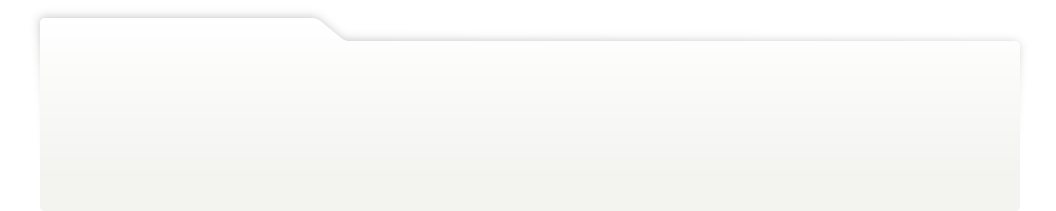
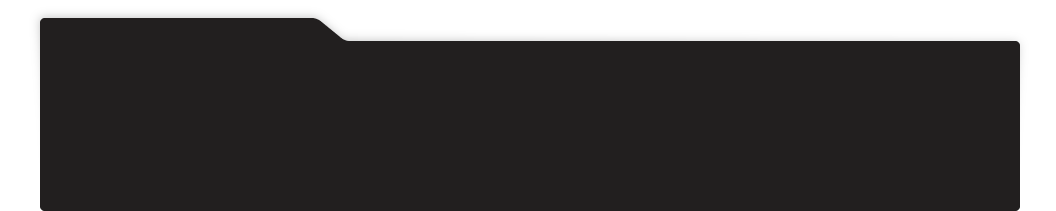
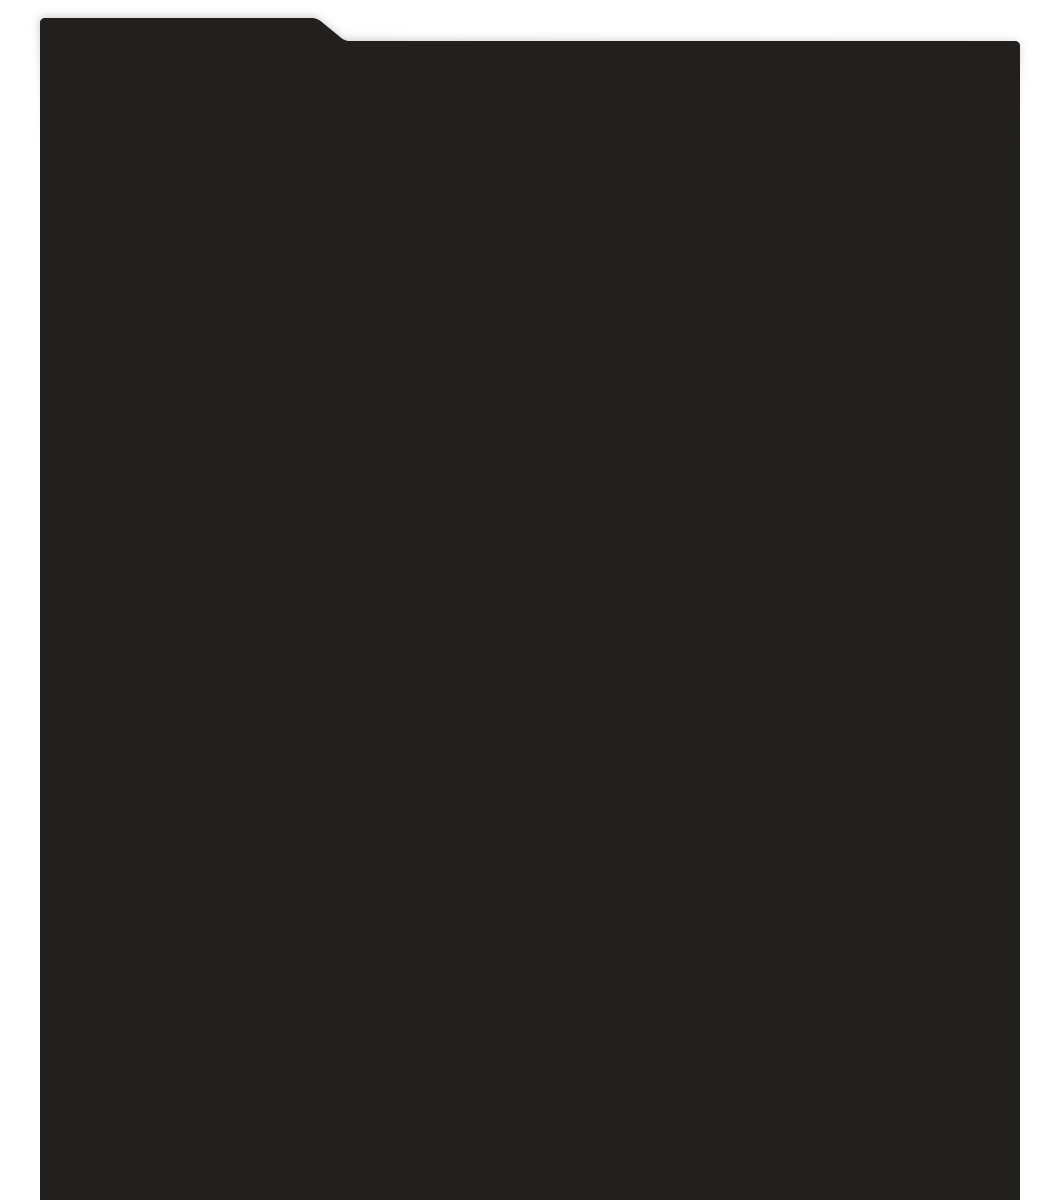
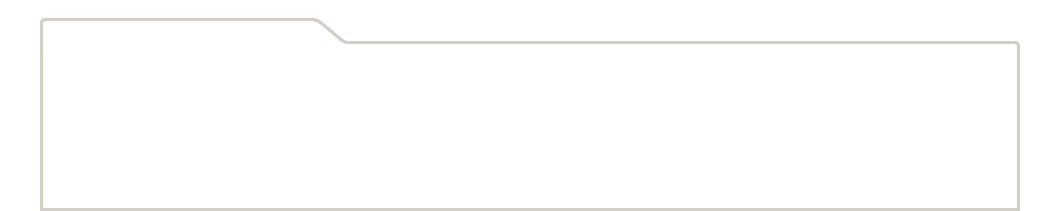
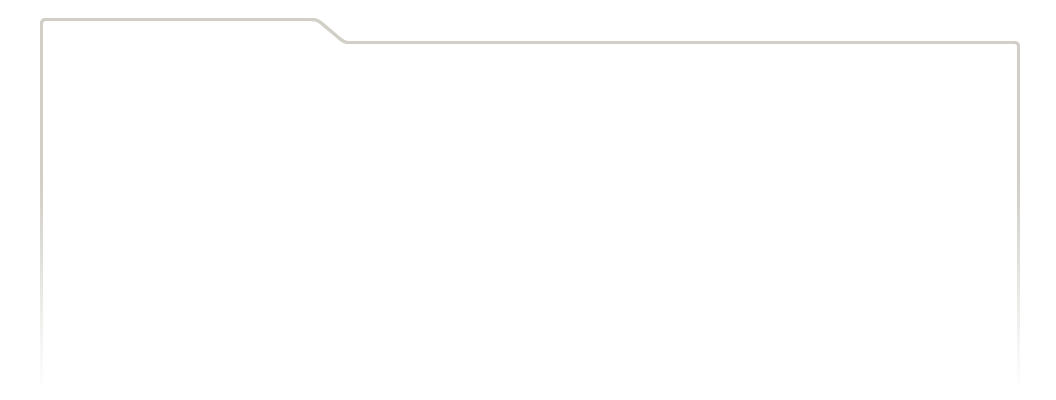
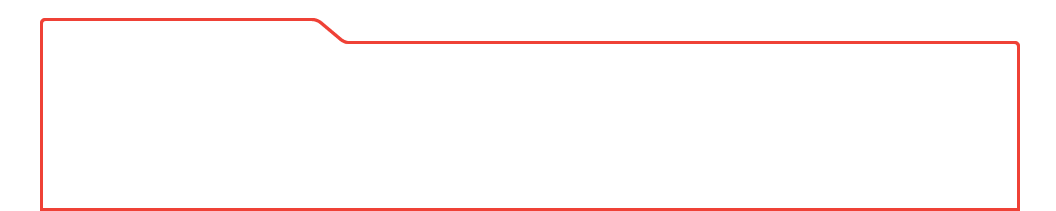
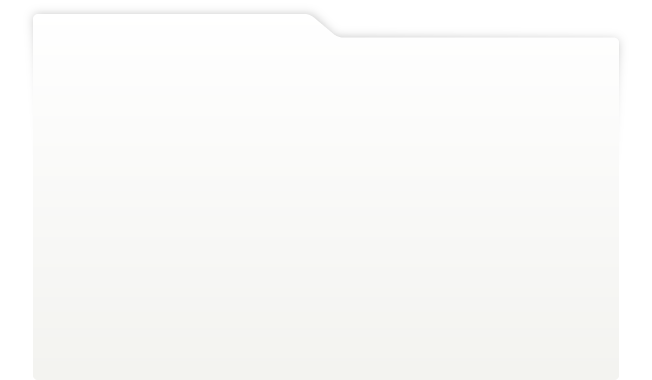
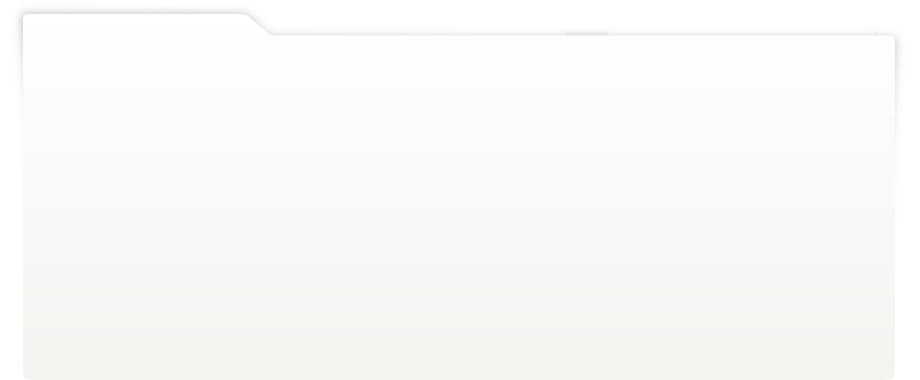
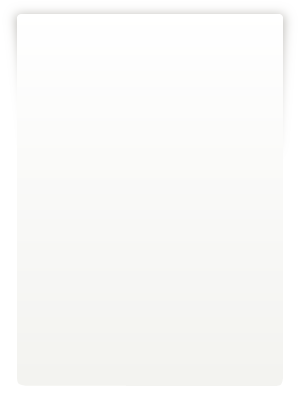
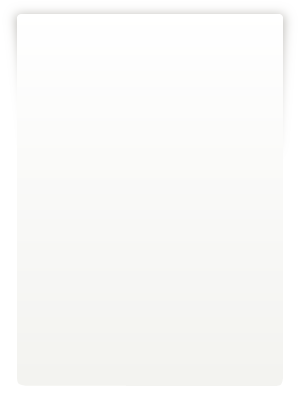
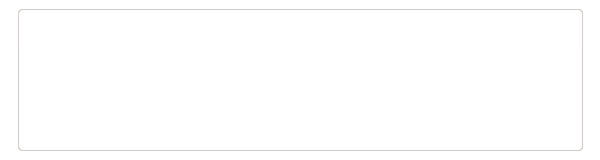
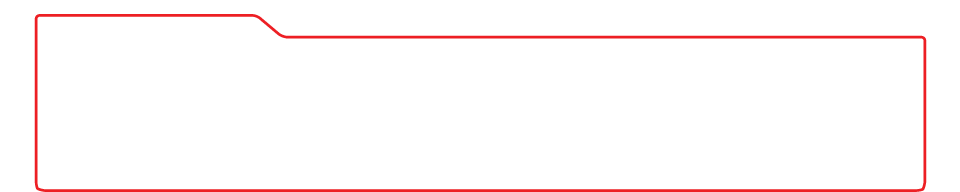
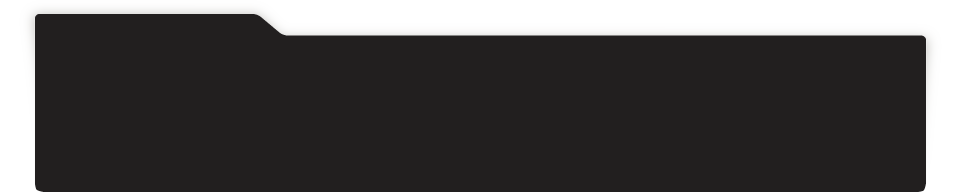
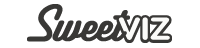
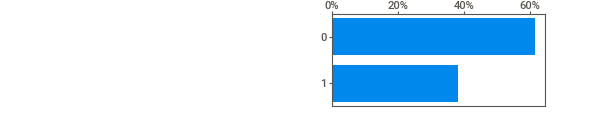
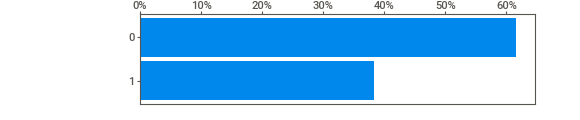
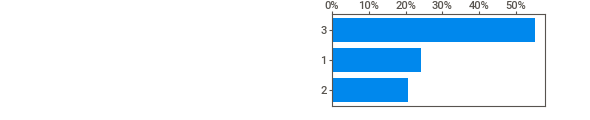
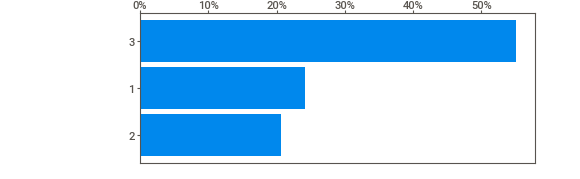
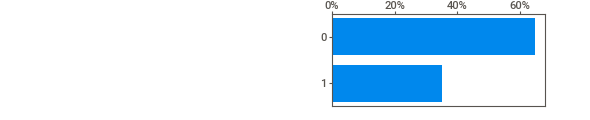
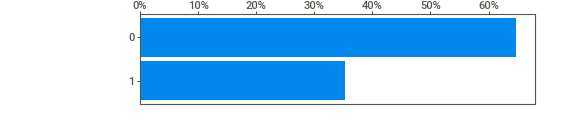
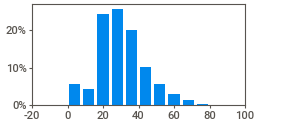
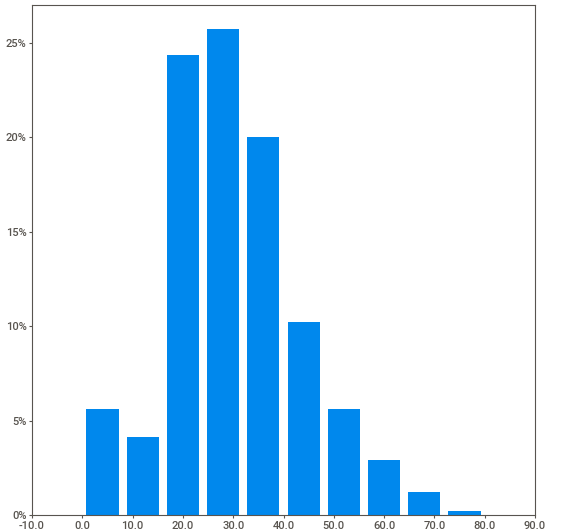
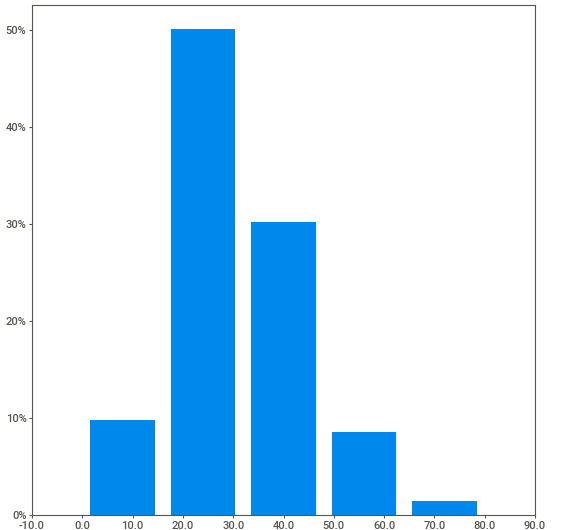
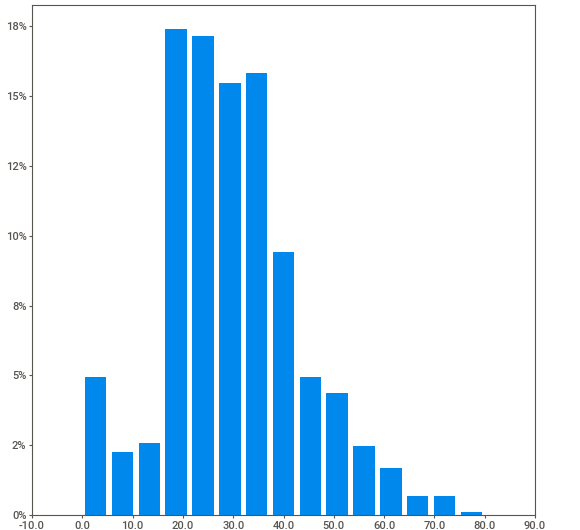
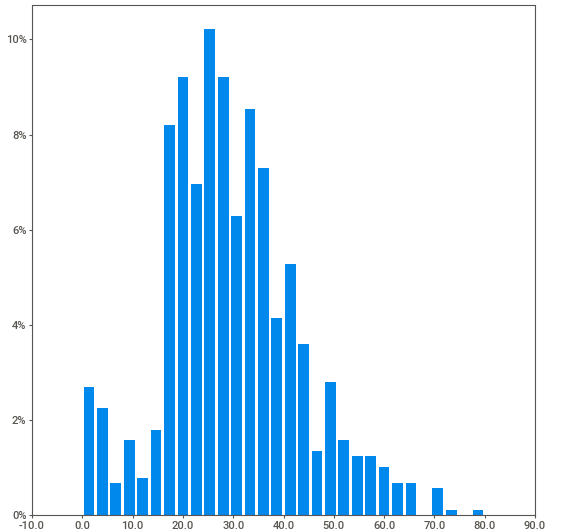
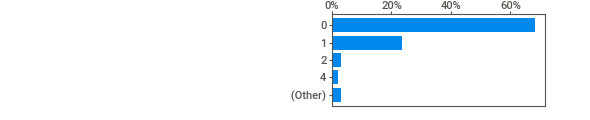
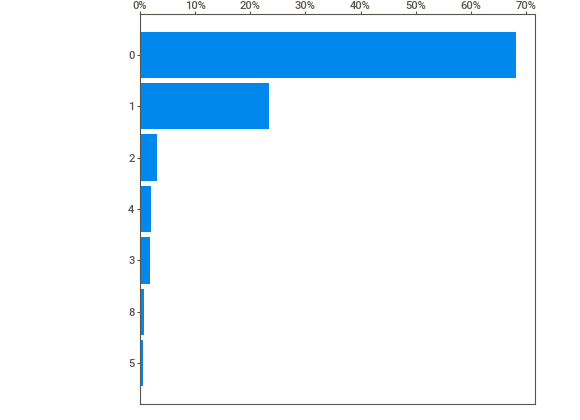
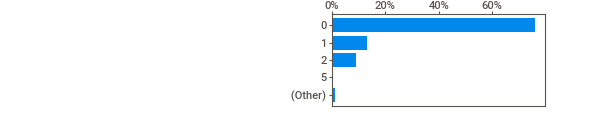
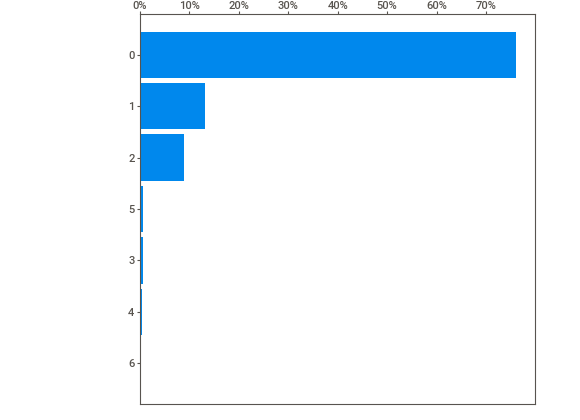
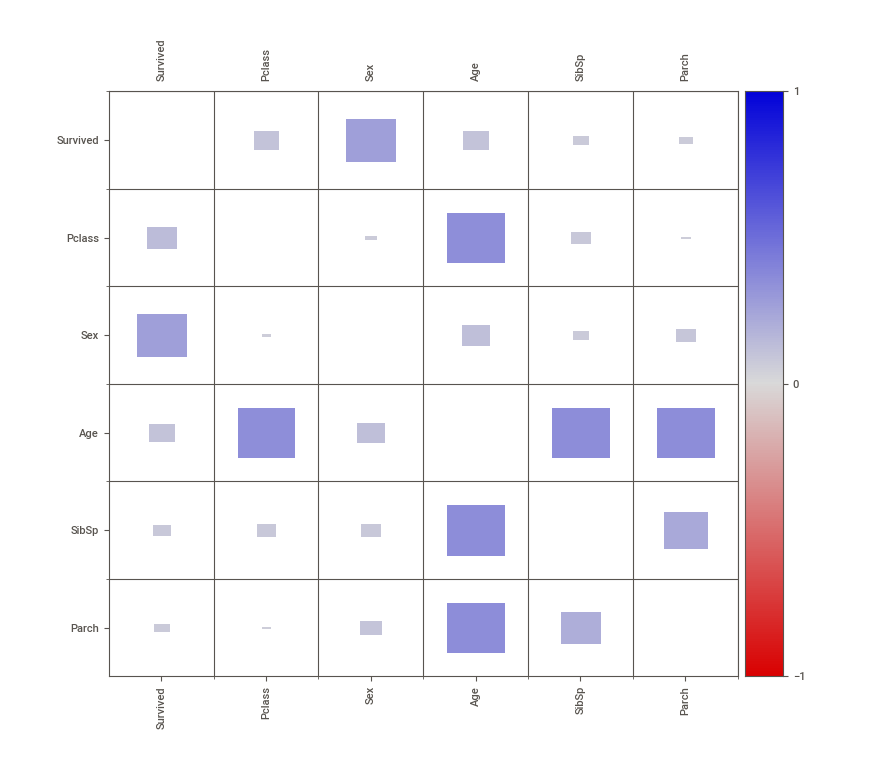
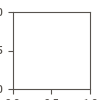

In [ ]:
my_report_train.show_notebook()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, criterion="gini")

X = data_train.drop(['Survived'], axis=1).values
Y = data_train['Survived'].values

clf.fit(X,Y)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

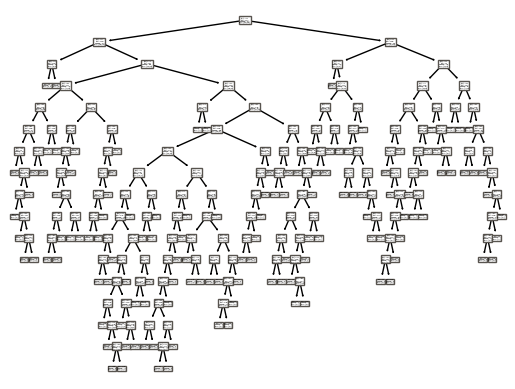

In [ ]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [ ]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


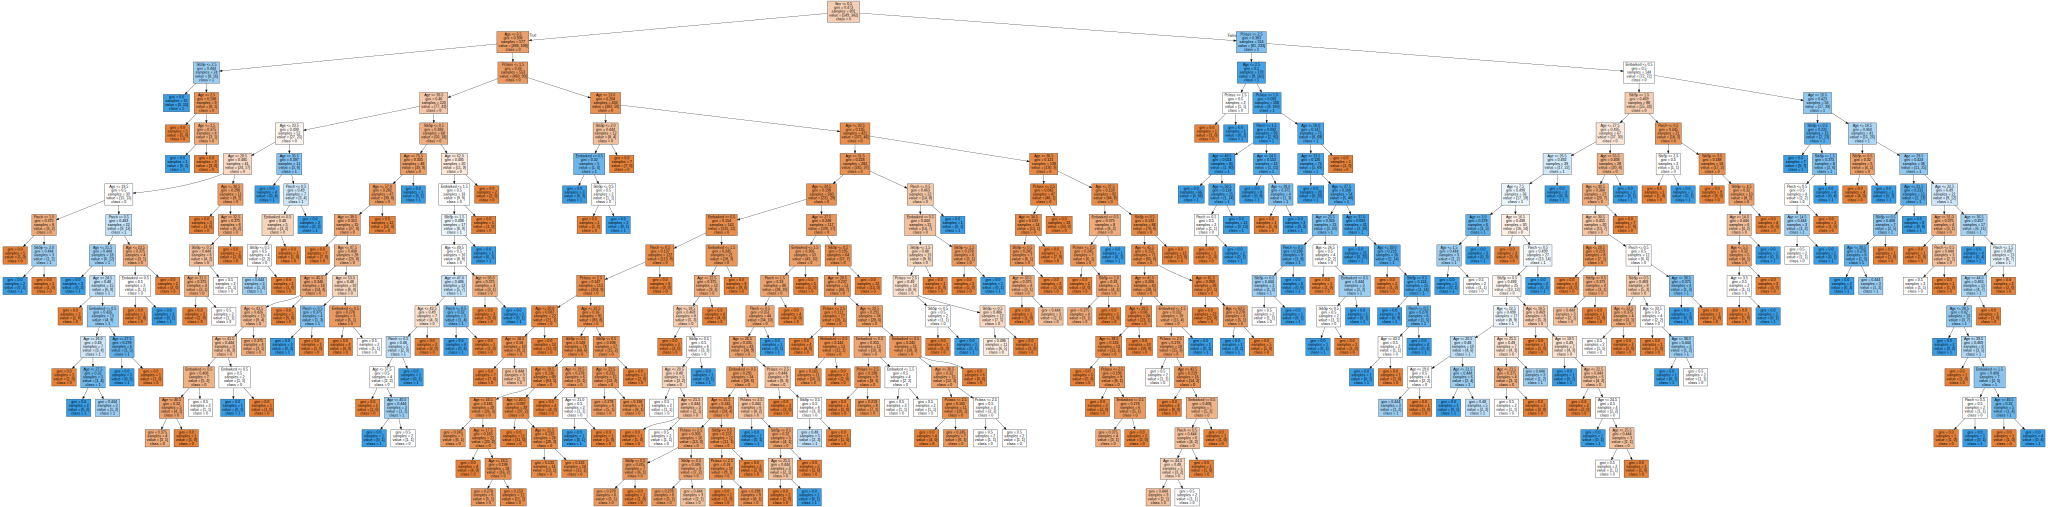

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=decisoes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("/content/drive/My Drive/IA 1-2024/Atividade 1/valoresPadroes", format='pdf')
graph

In [ ]:
X_test = data_test.values
Y_pred = clf.predict(X_test)

In [ ]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.8444976076555024

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

0.8200187969924813

In [ ]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [ ]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 15,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [ ]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [ ]:
data_gender.shape

(418, 2)

In [ ]:
# discretizar meus dados (colocar em baldes/faixas)

#for dataset in alldata:
 #   dataset['Age'] = dataset['Age'].astype(int)
#    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
##    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
 #   dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
 #   dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
 #   dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
 #   dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
 #   dataset.loc[ dataset['Age'] > 66, 'Age'] = 6



In [ ]:
#Variar os parâmetros abaixo, observando e reportando cada uma das árvores resultantes.
#a. Criterion = {“gini”, “entropy”}
#b. Splitter = {“best”, “random”}
#c. max_depth = {None,2, 4}
#d. min_samples_split = {2,10}
#2. Criar/plotar gráficos de barra
#3. Discutir diferenças entre as árvores?
